<a href="https://colab.research.google.com/github/Raoina/Spectra-2-Image/blob/main/notebooks/Image_Transformation/01_Cutting_Reshape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/spectra_train_795.csv'

#**Si-Ware Dataset**

In [3]:
df = pd.read_csv(file_path)

df.head()

,3921.568654,3935.185205,3948.801765,3962.418316,3976.034876,3989.651427,4003.267987,4016.884537,4030.501097,4044.117648,...,7284.857826,7298.474386,7312.090937,7325.707497,7339.324048,7352.940608,7366.557159,7380.173719,7393.790269,7407.406829
0,7.731999,7.718551,7.710458,7.711064,7.737815,7.804074,7.917703,8.084391,8.305121,8.581408,...,39.434374,40.055160,40.598417,41.100842,41.581208,42.040821,42.471291,42.871560,43.256242,43.652122
1,8.816287,8.788129,8.766515,8.759930,8.788626,8.867255,9.002688,9.199111,9.456329,9.775289,...,41.691460,42.291408,42.819332,43.311783,43.786027,44.242174,44.671326,45.073241,45.464006,45.869690
2,11.654563,11.599259,11.556025,11.537171,11.567205,11.660491,11.826111,12.069383,12.392232,12.797656,...,48.416520,48.967955,49.455890,49.920100,50.375166,50.813820,51.220774,51.593550,51.952543,52.330722
3,9.788336,9.770440,9.757598,9.758017,9.794892,9.884525,10.036416,10.256776,10.545745,10.903426,...,41.522420,42.021026,42.454848,42.866244,43.277539,43.688031,44.080964,44.443003,44.778220,45.106905
4,5.388178,5.370277,5.356899,5.353594,5.370518,5.414576,5.488960,5.595201,5.733272,5.904100,...,31.535812,32.180466,32.737746,33.241077,33.712043,34.159624,34.584676,34.991426,35.392924,35.808500


In [5]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display columns with null values and their counts
print("Number of null values per column:")
print(null_counts[null_counts > 0])

Number of null values per column:
Series([], dtype: int64)


In [ ]:
# # Select columns that contain numeric names, excluding 'Sample ID'
# spectral_cols = [col for col in df.columns if col != 'Sample ID' and col.replace('.', '', 1).isdigit()]
# spectra_df = df[spectral_cols]

# # Display the head of the new dataframe
# display(spectra_df.head())

,3921.568654,3935.185205,3948.801765,3962.418316,3976.034876,3989.651427,4003.267987,4016.884537,4030.501097,4044.117648,...,7284.857826,7298.474386,7312.090937,7325.707497,7339.324048,7352.940608,7366.557159,7380.173719,7393.790269,7407.406829
0,7.729080,7.622415,7.546208,7.481664,7.423155,7.377601,7.358989,7.381517,7.454154,7.577913,...,34.616084,35.288379,35.845357,36.327769,36.777222,37.228529,37.695179,38.173677,38.652607,39.125314
1,9.720940,9.584006,9.485654,9.401768,9.326291,9.270802,9.256881,9.306069,9.431605,9.634163,...,42.449703,43.100897,43.648566,44.136925,44.609373,45.097435,45.608556,46.131176,46.646221,47.142563
2,7.551404,7.444440,7.367629,7.300275,7.237015,7.186719,7.165871,7.190576,7.270485,7.406037,...,34.907780,35.560699,36.103651,36.578961,37.026430,37.475247,37.932452,38.389652,38.834516,39.264430
3,6.526686,6.434280,6.366056,6.301643,6.235700,6.175937,6.136361,6.129914,6.163474,6.236180,...,27.640183,28.252847,28.764077,29.212927,29.634762,30.056096,30.485576,30.919745,31.351121,31.777759
4,6.840954,6.757292,6.697071,6.637614,6.573048,6.512227,6.471038,6.464014,6.498781,6.574416,...,28.069196,28.715024,29.254844,29.724470,30.160514,30.594707,31.040131,31.494608,31.948344,32.395361


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-144439145.py:8: SyntaxWarning: invalid escape sequence '\d'
  spectrum = row.filter(regex='\d').drop('Sample ID', errors='ignore')


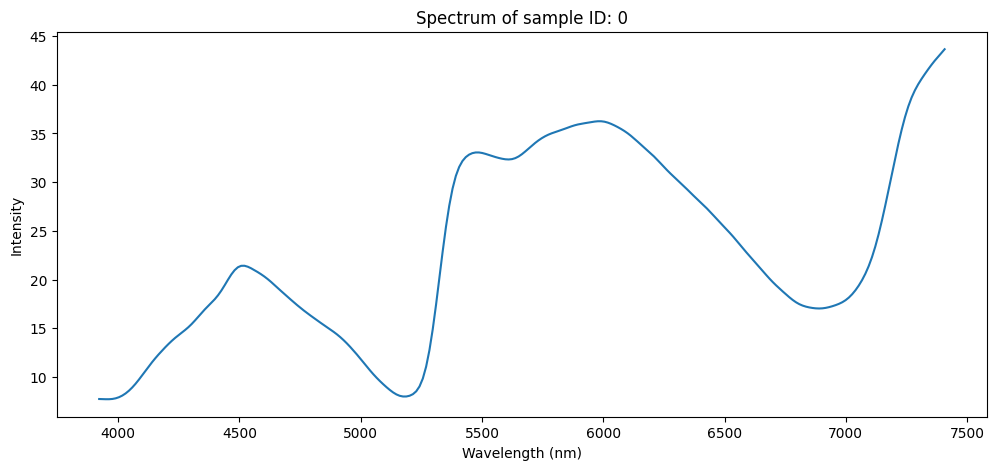

In [20]:
import matplotlib.pyplot as plt

row = df.iloc[0]

spectrum = row.filter(regex='\d').drop('Sample ID', errors='ignore')

wavelengths = spectrum.index.astype(float)
intensity = spectrum.values

plt.figure(figsize=(12, 5))
plt.plot(wavelengths, intensity)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title(f"Spectrum of sample ID: {row.name}")
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3913711652.py:9: SyntaxWarning: invalid escape sequence '\d'
  spectrum = row.filter(regex='\d').drop('Sample ID', errors='ignore')


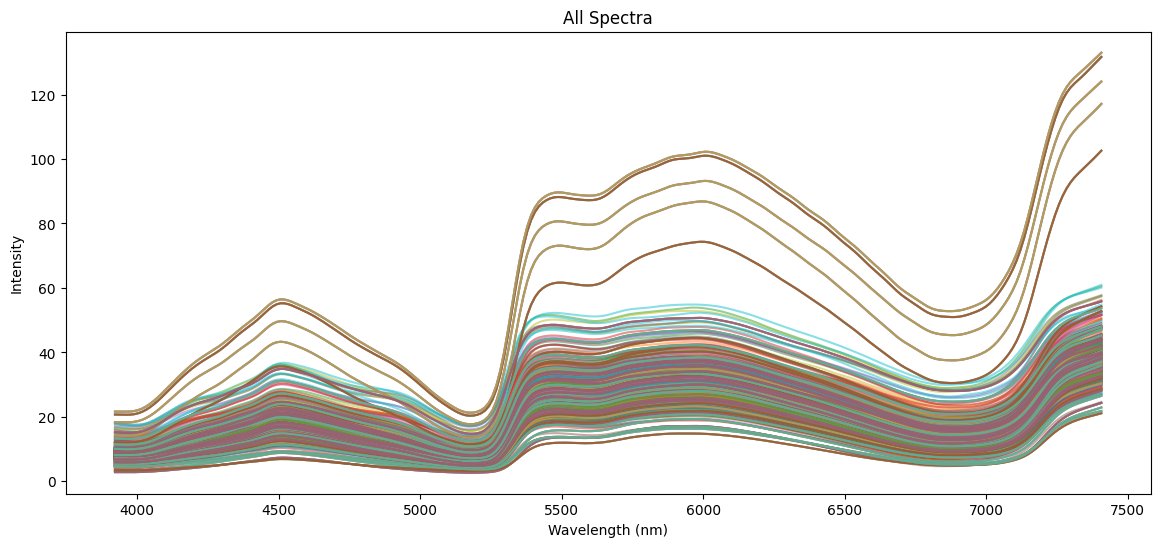

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

for index, row in df.iterrows():
    spectrum = row.filter(regex='\d').drop('Sample ID', errors='ignore')

    wavelengths = spectrum.index.astype(float)
    intensity = spectrum.values

    plt.plot(wavelengths, intensity, alpha=0.5)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("All Spectra")
plt.show()

## Norm -1,1 and resamling 16 * 16 not drop

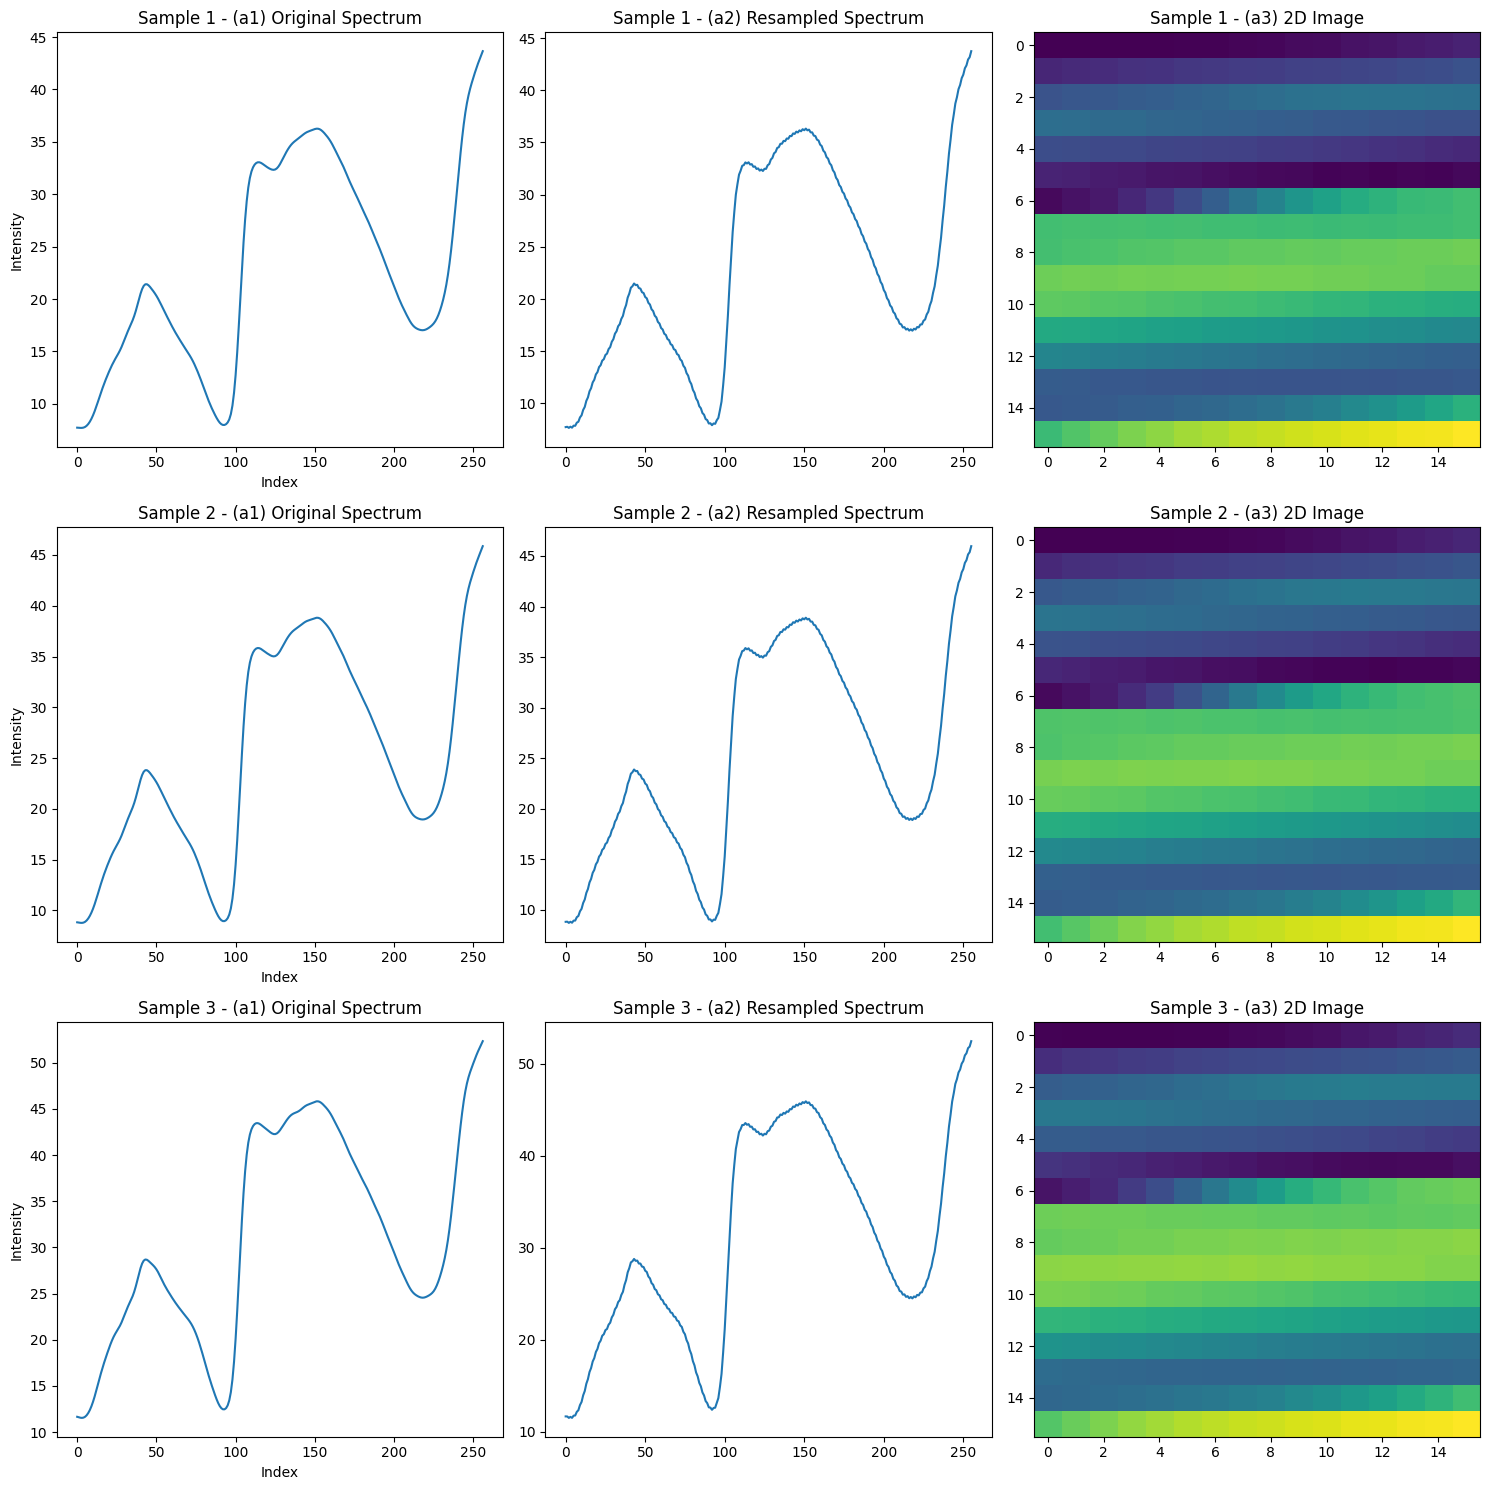

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

num_samples = 3
img_size = 16
target_size = img_size * img_size

fig, axs = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))

for idx in range(num_samples):
    spectrum = df.iloc[idx].values.astype(float)

    resampled = signal.resample(spectrum, target_size)

    min_val, max_val = resampled.min(), resampled.max()
    normalized = 2 * (resampled - min_val) / (max_val - min_val) - 1

    img = normalized.reshape(img_size, img_size)

    axs[idx, 0].plot(spectrum)
    axs[idx, 0].set_title(f"Sample {idx+1} - (a1) Original Spectrum")
    axs[idx, 0].set_xlabel("Index")
    axs[idx, 0].set_ylabel("Intensity")

    axs[idx, 1].plot(resampled)
    axs[idx, 1].set_title(f"Sample {idx+1} - (a2) Resampled Spectrum")

    im = axs[idx, 2].imshow(img, cmap="viridis", aspect="auto")
    axs[idx, 2].set_title(f"Sample {idx+1} - (a3) 2D Image")

plt.tight_layout()
plt.show()

## auto scale 16 *16 with resapmling

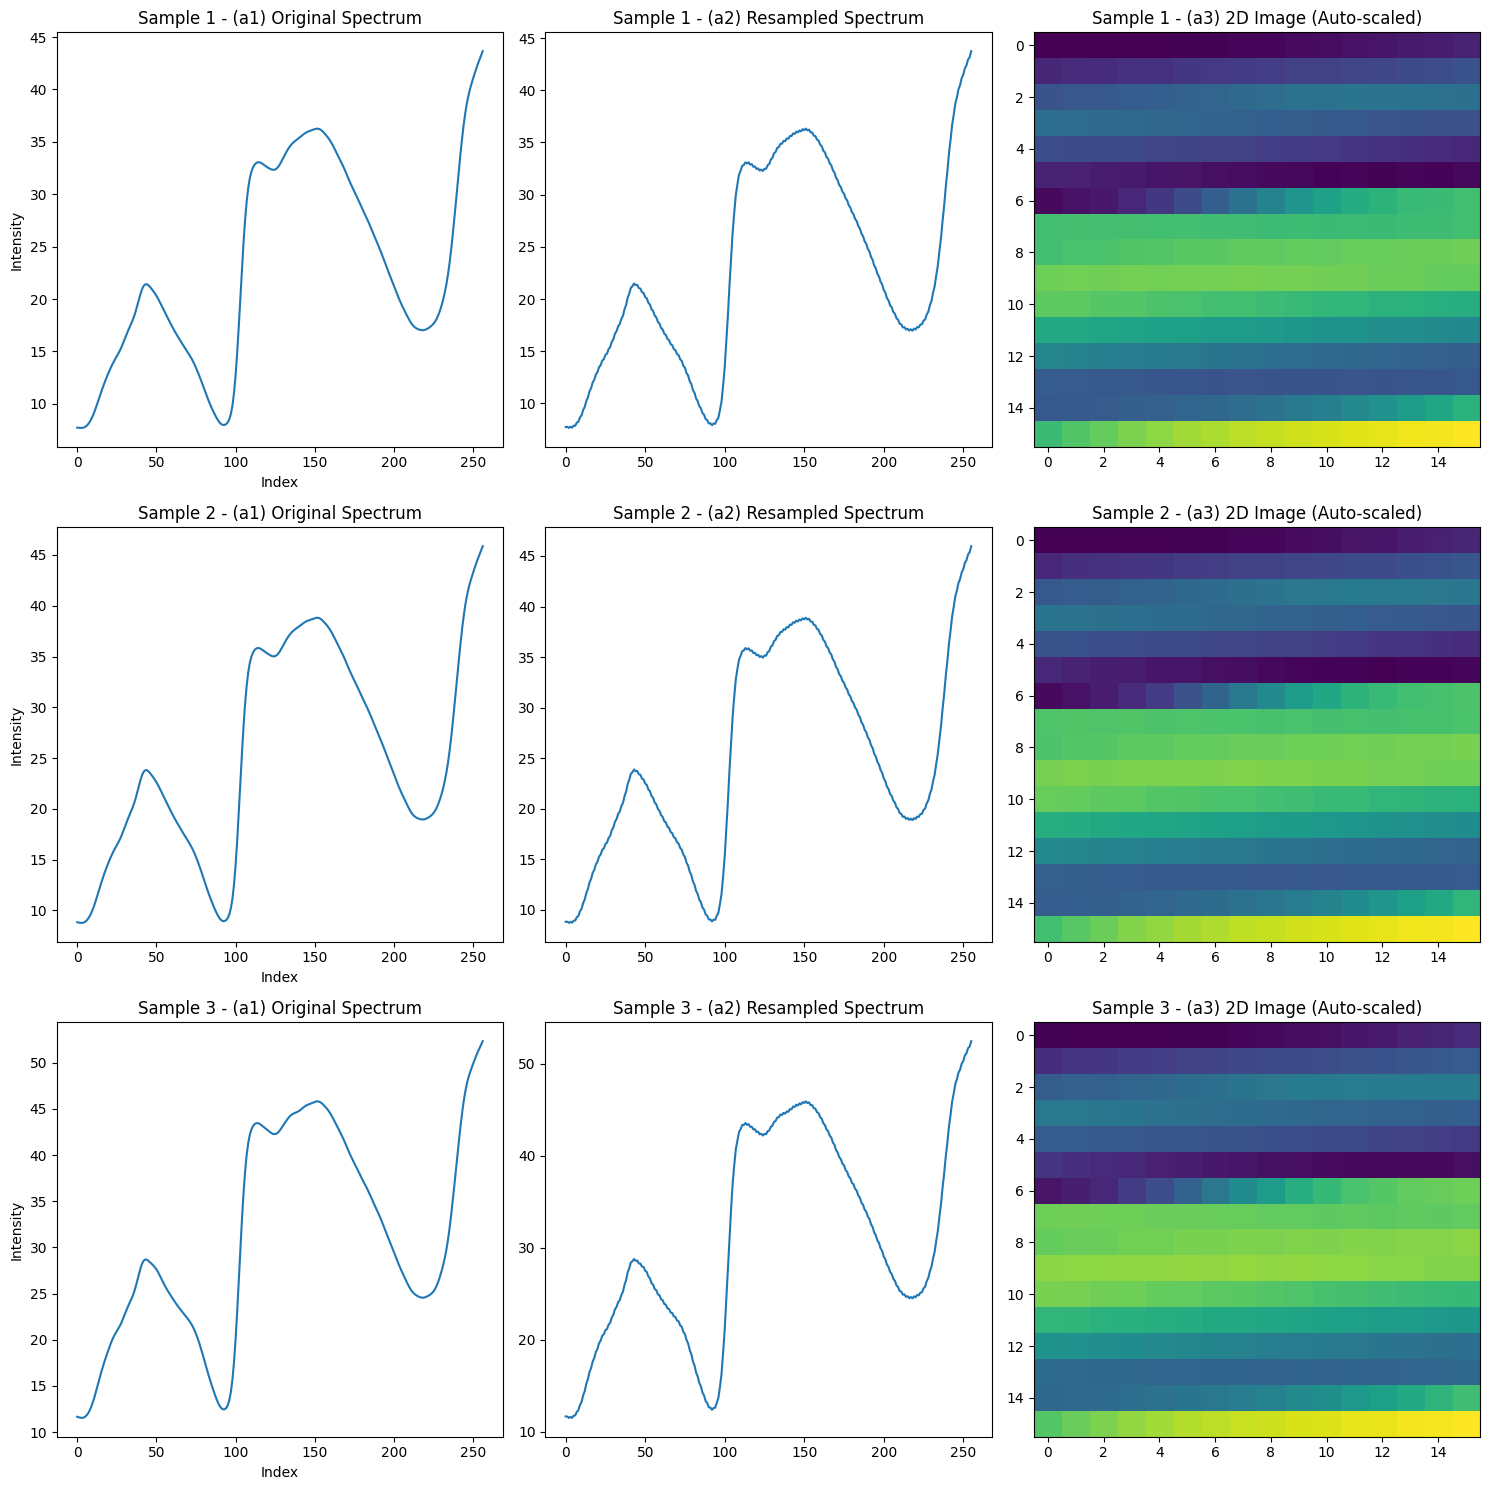

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

num_samples = 3
img_size = 16
target_size = img_size * img_size

fig, axs = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))

for idx in range(num_samples):
    spectrum = df.iloc[idx].values.astype(float)

    resampled = signal.resample(spectrum, target_size)

    mean_val = resampled.mean()
    std_val = resampled.std()
    if std_val == 0:
        standardized = resampled - mean_val
    else:
        standardized = (resampled - mean_val) / std_val

    img = standardized.reshape(img_size, img_size)

    axs[idx, 0].plot(spectrum)
    axs[idx, 0].set_title(f"Sample {idx+1} - (a1) Original Spectrum")
    axs[idx, 0].set_xlabel("Index")
    axs[idx, 0].set_ylabel("Intensity")

    axs[idx, 1].plot(resampled)
    axs[idx, 1].set_title(f"Sample {idx+1} - (a2) Resampled Spectrum")

    im = axs[idx, 2].imshow(img, cmap="viridis", aspect="auto")
    axs[idx, 2].set_title(f"Sample {idx+1} - (a3) 2D Image (Auto-scaled)")

plt.tight_layout()
plt.show()

norm -1,1 snake 65*65

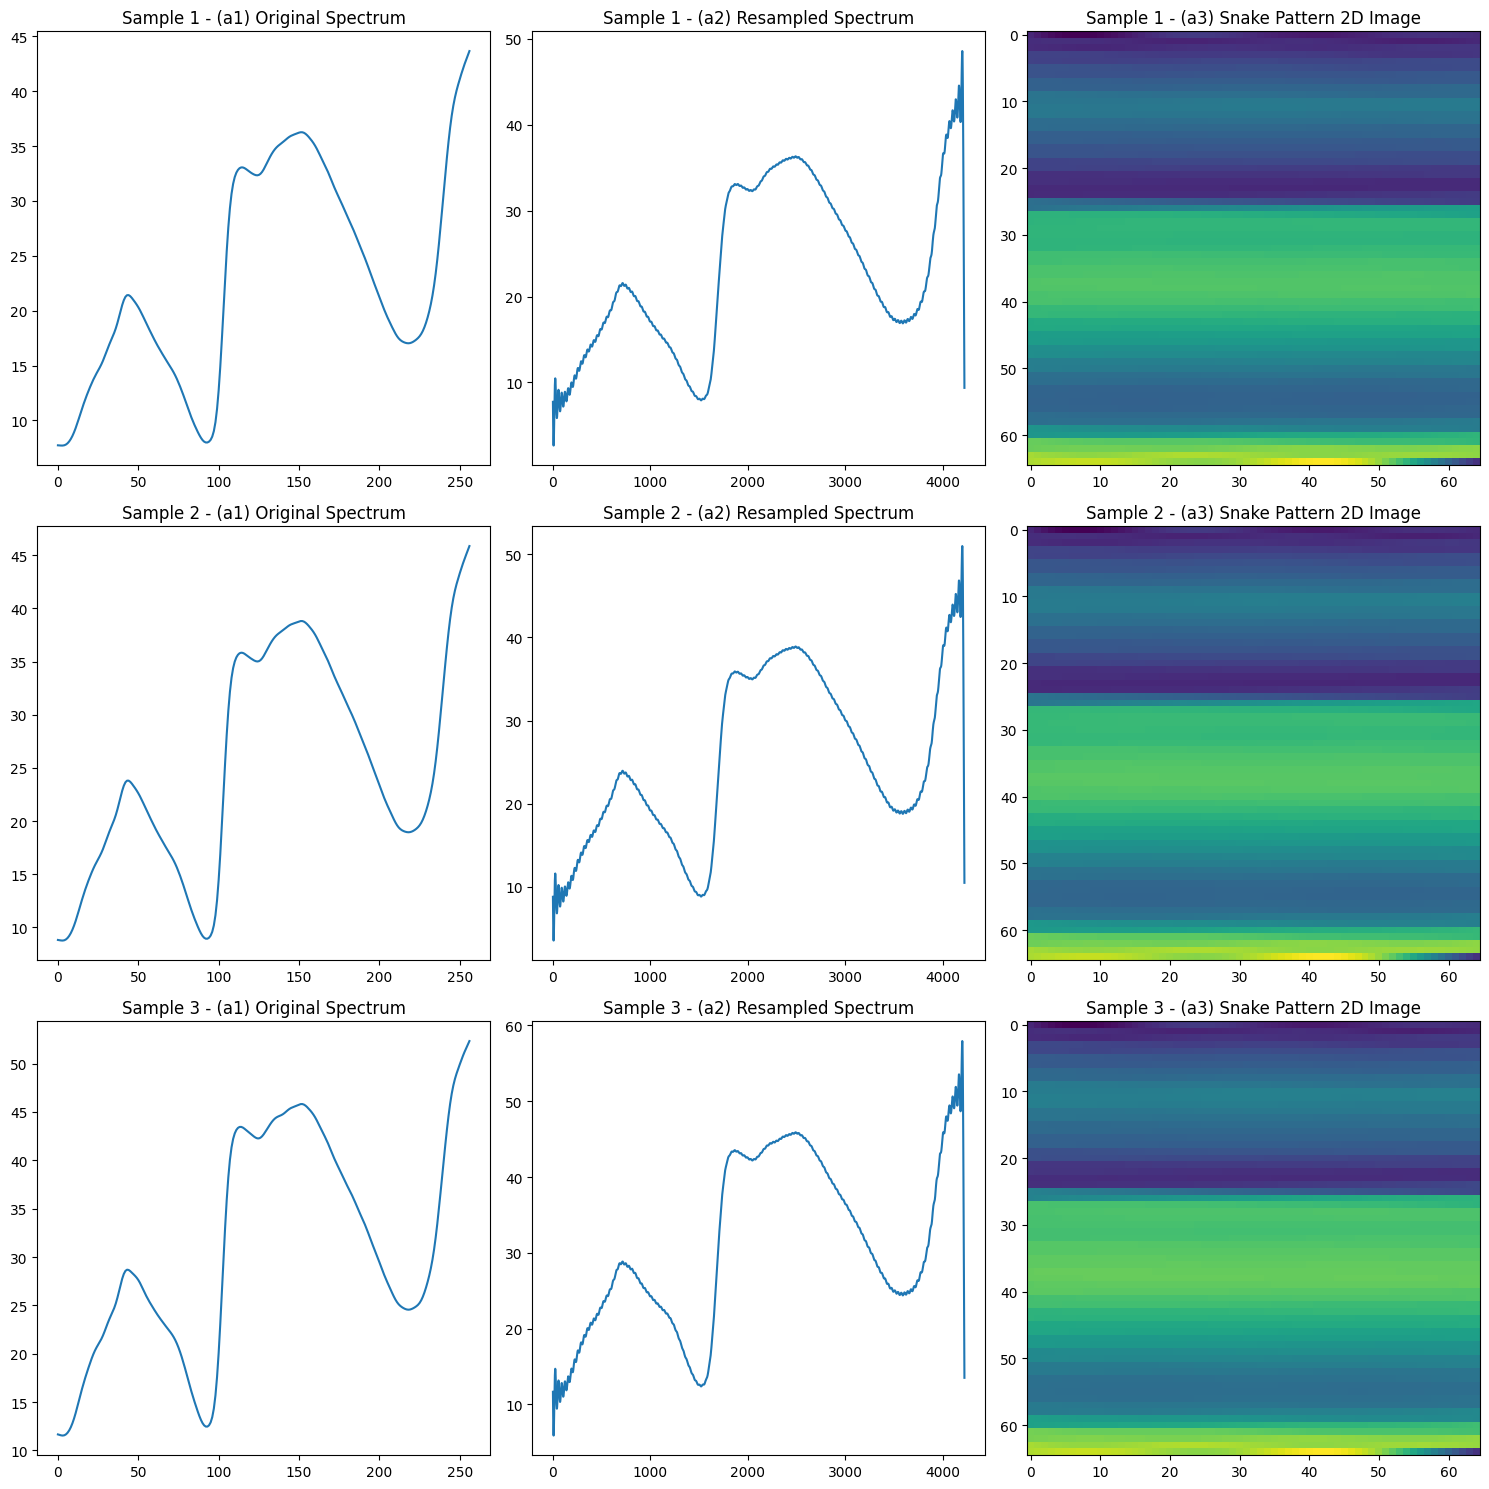

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

num_samples = 3
img_size = 65
target_size = img_size * img_size

fig, axs = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))

def to_snake_pattern(vector, img_size):
    img = np.zeros((img_size, img_size))
    for i in range(img_size):
        row = vector[i * img_size:(i + 1) * img_size]
        if i % 2 == 1:
            row = row[::-1]
        img[i, :] = row
    return img

for idx in range(num_samples):
    spectrum = df.iloc[idx].values.astype(float)

    resampled = signal.resample(spectrum, target_size)

    min_val, max_val = resampled.min(), resampled.max()
    normalized = 2 * (resampled - min_val) / (max_val - min_val) - 1

    img = to_snake_pattern(normalized, img_size)

    axs[idx, 0].plot(spectrum)
    axs[idx, 0].set_title(f"Sample {idx+1} - (a1) Original Spectrum")

    axs[idx, 1].plot(resampled)
    axs[idx, 1].set_title(f"Sample {idx+1} - (a2) Resampled Spectrum")

    im = axs[idx, 2].imshow(img, cmap="viridis", aspect="auto")
    axs[idx, 2].set_title(f"Sample {idx+1} - (a3) Snake Pattern 2D Image")

plt.tight_layout()
plt.show()

## auto scale 65 *65

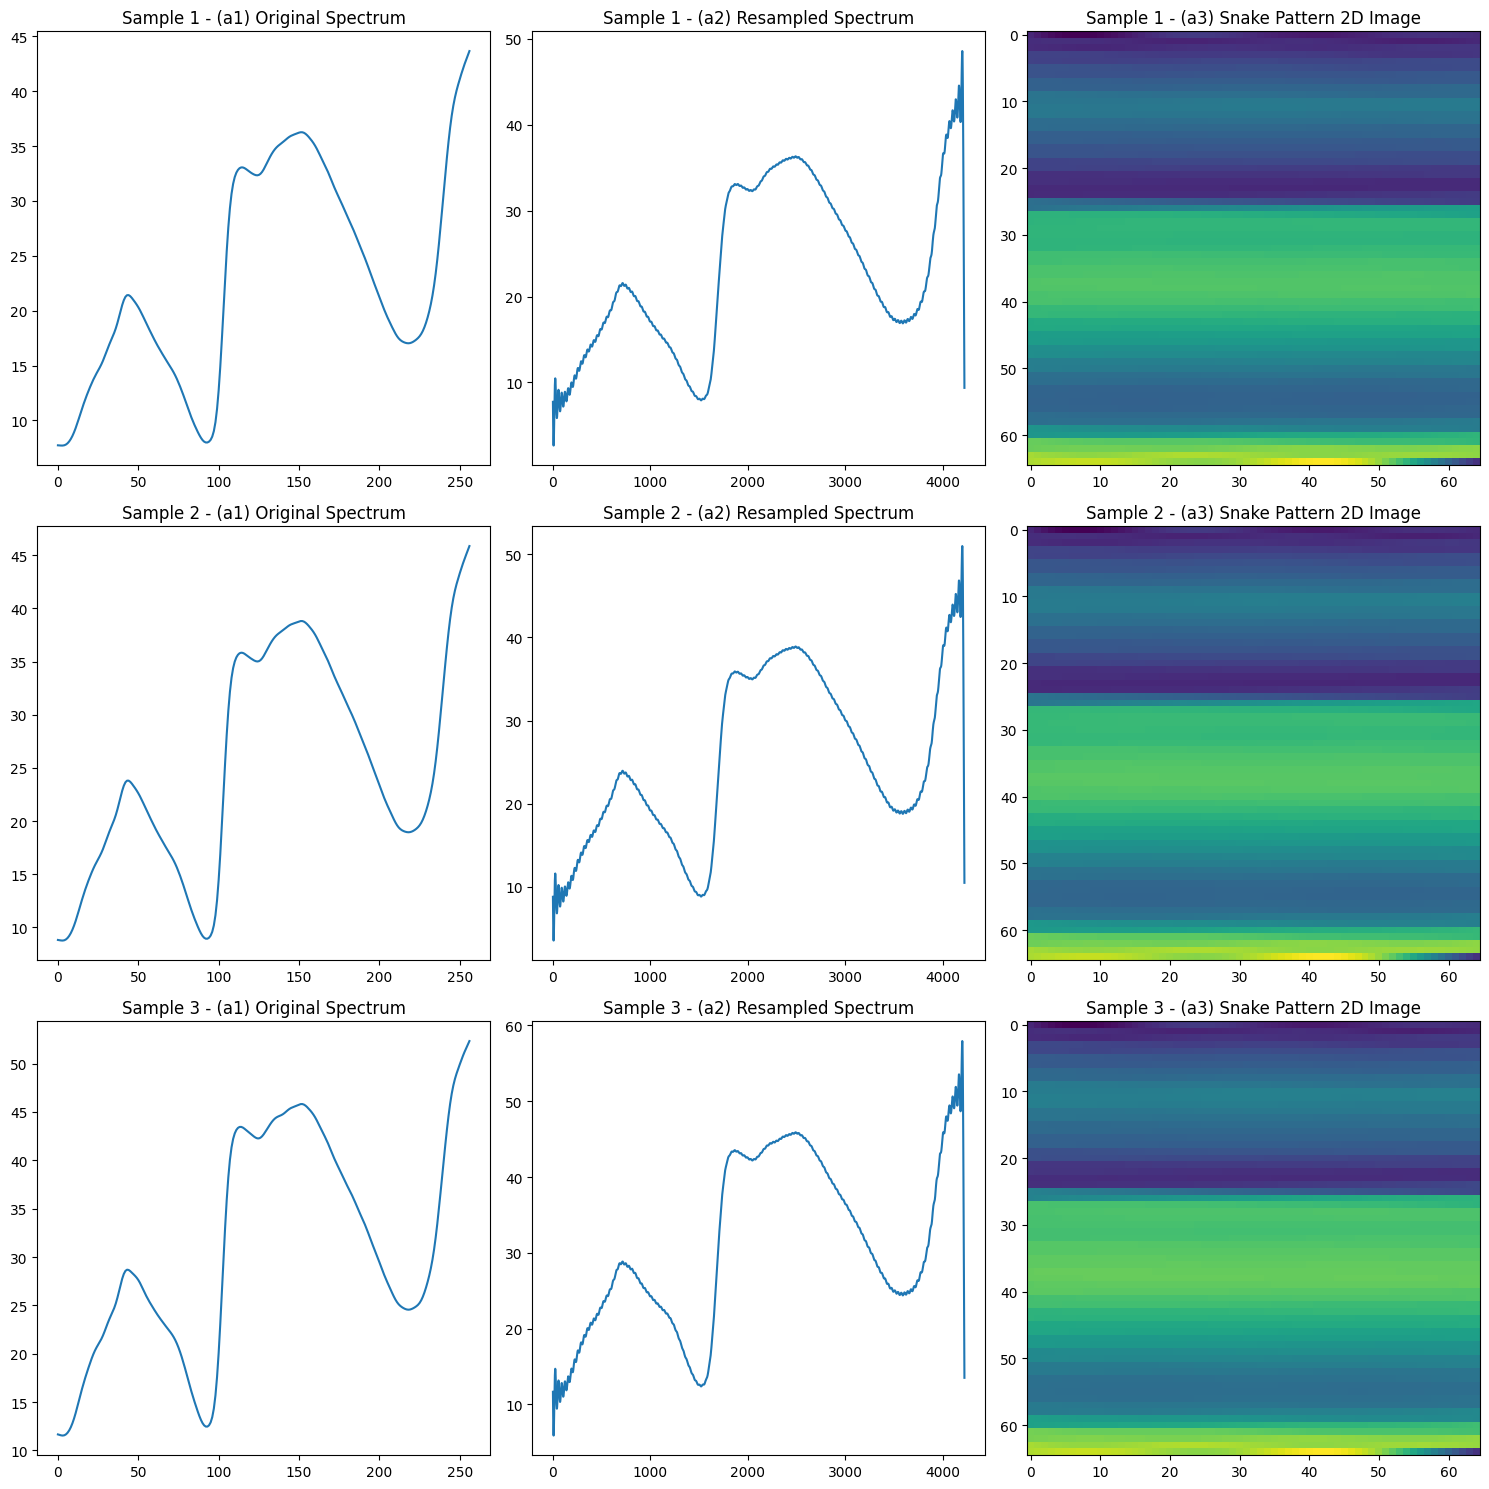

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

num_samples = 3
img_size = 65
target_size = img_size * img_size

fig, axs = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))

def to_snake_pattern(vector, img_size):
    img = np.zeros((img_size, img_size))
    for i in range(img_size):
        row = vector[i * img_size:(i + 1) * img_size]
        if i % 2 == 1:
            row = row[::-1]
        img[i, :] = row
    return img

for idx in range(num_samples):
    spectrum = df.iloc[idx].values.astype(float)

    resampled = signal.resample(spectrum, target_size)

    mean_val = resampled.mean()
    std_val = resampled.std()
    normalized = (resampled - mean_val) / std_val

    img = to_snake_pattern(normalized, img_size)

    axs[idx, 0].plot(spectrum)
    axs[idx, 0].set_title(f"Sample {idx+1} - (a1) Original Spectrum")

    axs[idx, 1].plot(resampled)
    axs[idx, 1].set_title(f"Sample {idx+1} - (a2) Resampled Spectrum")

    im = axs[idx, 2].imshow(img, cmap="viridis", aspect="auto")
    axs[idx, 2].set_title(f"Sample {idx+1} - (a3) Snake Pattern 2D Image")

plt.tight_layout()
plt.show()

### Generate and Save 16x16 Images (Batch Processing)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # for resampling
import os

# ---------- Parameters ----------
save_dir = "/content/CR_16_auto_scale"
os.makedirs(save_dir, exist_ok=True)

img_size = 16
target_size = img_size * img_size
batch_size = 100
total_rows = len(df)

for batch_start in range(0, total_rows, batch_size):
    batch_end = min(batch_start + batch_size, total_rows)
    print(f"Processing batch: {batch_start} to {batch_end-1}")

    for idx in range(batch_start, batch_end):
        # (0) spectrum from dataset
        spectrum = df.iloc[idx].values.astype(float)

        # (1) Resampling
        resampled = signal.resample(spectrum, target_size)

        # (2) Standard Normalization (Z-score)
        mean_val = resampled.mean()
        std_val = resampled.std()
        normalized = (resampled - mean_val) / std_val

        # (3) Reshape into (img_size x img_size)
        img = normalized.reshape(img_size, img_size)

        # (4) Save image
        plt.figure(figsize=(0.16, 0.16), dpi=100)  # ~16×16 px
        plt.imshow(img, cmap="viridis", origin="upper")
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.savefig(os.path.join(save_dir, f"RESAMP_{idx}.png"))
        plt.close()

    print(f"Batch {batch_start} to {batch_end-1} done ✅")


Processing batch: 0 to 99
Batch 0 to 99 done ✅
Processing batch: 100 to 199
Batch 100 to 199 done ✅
Processing batch: 200 to 299
Batch 200 to 299 done ✅
Processing batch: 300 to 399
Batch 300 to 399 done ✅
Processing batch: 400 to 499
Batch 400 to 499 done ✅
Processing batch: 500 to 599
Batch 500 to 599 done ✅
Processing batch: 600 to 699
Batch 600 to 699 done ✅
Processing batch: 700 to 794
Batch 700 to 794 done ✅


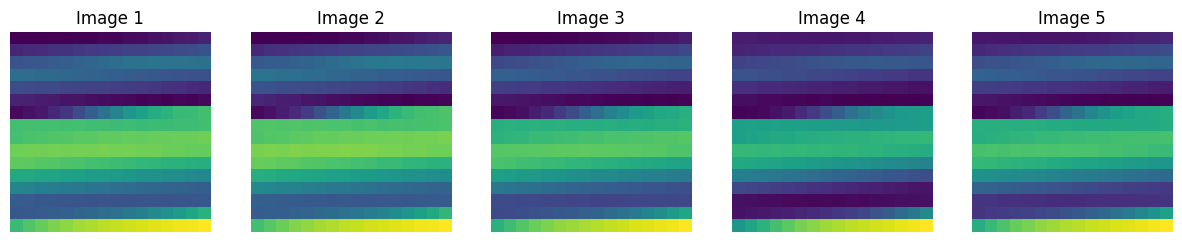

In [29]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# ----- Path to images -----
img_dir = "/content/CR_16_auto_scale" # Changed to the new directory

# ----- Get first 5 image paths -----
img_files = sorted(os.listdir(img_dir))[:5]

# ----- Read and show images -----
plt.figure(figsize=(15, 5))
for i, file in enumerate(img_files):
    img_path = os.path.join(img_dir, file)
    img = Image.open(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis("off")

plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # for resampling
import os

# ---------- Parameters ----------
save_dir = "/content/CR_16_norm"
os.makedirs(save_dir, exist_ok=True)

img_size = 16
target_size = img_size * img_size
batch_size = 100
total_rows = len(df)

for batch_start in range(0, total_rows, batch_size):
    batch_end = min(batch_start + batch_size, total_rows)
    print(f"Processing batch: {batch_start} to {batch_end-1}")

    for idx in range(batch_start, batch_end):
        # (0) spectrum from dataset
        spectrum = df.iloc[idx].values.astype(float)

        # (1) Resampling
        resampled = signal.resample(spectrum, target_size)

        # (2) Auto-scaling (Standardization)
        mean_val = resampled.mean()
        std_val = resampled.std()
        if std_val == 0:
            standardized = resampled - mean_val
        else:
            standardized = (resampled - mean_val) / std_val

        # (3) Reshape into (img_size x img_size)
        img = standardized.reshape(img_size, img_size)

        # (4) Save image
        plt.figure(figsize=(0.16, 0.16), dpi=100)  # ~16×16 px
        plt.imshow(img, cmap="viridis", origin="upper")
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.savefig(os.path.join(save_dir, f"RESAMP_{idx}.png"))
        plt.close()

    print(f"Batch {batch_start} to {batch_end-1} done ✅")


Processing batch: 0 to 99
Batch 0 to 99 done ✅
Processing batch: 100 to 199
Batch 100 to 199 done ✅
Processing batch: 200 to 299
Batch 200 to 299 done ✅
Processing batch: 300 to 399
Batch 300 to 399 done ✅
Processing batch: 400 to 499
Batch 400 to 499 done ✅
Processing batch: 500 to 599
Batch 500 to 599 done ✅
Processing batch: 600 to 699
Batch 600 to 699 done ✅
Processing batch: 700 to 794
Batch 700 to 794 done ✅


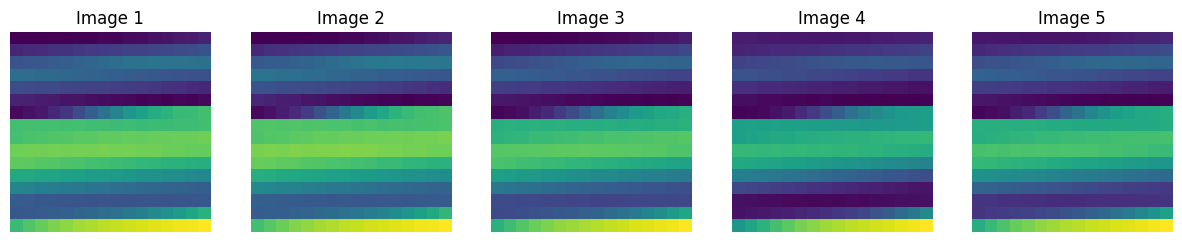

In [31]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# ----- Path to images -----
img_dir = "/content/CR_16_norm" # Changed to the new directory

# ----- Get first 5 image paths -----
img_files = sorted(os.listdir(img_dir))[:5]

# ----- Read and show images -----
plt.figure(figsize=(15, 5))
for i, file in enumerate(img_files):
    img_path = os.path.join(img_dir, file)
    img = Image.open(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis("off")

plt.show()

### Generate and Save 65x65 Images (Batch Processing)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # for resampling
import os

# ---------- Parameters ----------
save_dir = "/content/CR_65_snake_auto_scale"
os.makedirs(save_dir, exist_ok=True)

img_size = 16
target_size = img_size * img_size
batch_size = 100
total_rows = len(df)

def to_snake_pattern(vector, img_size):
    """1D vector -> 2D snake pattern image"""
    img = np.zeros((img_size, img_size))
    for i in range(img_size):
        row = vector[i * img_size:(i + 1) * img_size]
        if i % 2 == 1:
            row = row[::-1]
        img[i, :] = row
    return img

for batch_start in range(0, total_rows, batch_size):
    batch_end = min(batch_start + batch_size, total_rows)
    print(f"Processing batch: {batch_start} to {batch_end-1}")

    for idx in range(batch_start, batch_end):
        # (0) spectrum from dataset
        spectrum = df.iloc[idx].values.astype(float)

        # (1) Resampling
        resampled = signal.resample(spectrum, target_size)

        # (2) Standard Normalization (Z-score)
        mean_val = resampled.mean()
        std_val = resampled.std()
        normalized = (resampled - mean_val) / std_val

        # (3) Reshape into Snake Pattern
        img = to_snake_pattern(normalized, img_size)

        # (4) Save image
        plt.figure(figsize=(0.16, 0.16), dpi=100)
        plt.imshow(img, cmap="viridis", origin="upper")
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.savefig(os.path.join(save_dir, f"SNAKE_{idx}.png"))
        plt.close()

    print(f"Batch {batch_start} to {batch_end-1} done ✅")


Processing batch: 0 to 99
Batch 0 to 99 done ✅
Processing batch: 100 to 199
Batch 100 to 199 done ✅
Processing batch: 200 to 299
Batch 200 to 299 done ✅
Processing batch: 300 to 399
Batch 300 to 399 done ✅
Processing batch: 400 to 499
Batch 400 to 499 done ✅
Processing batch: 500 to 599
Batch 500 to 599 done ✅
Processing batch: 600 to 699
Batch 600 to 699 done ✅
Processing batch: 700 to 794
Batch 700 to 794 done ✅


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # for resampling
import os

# ---------- Parameters ----------
save_dir = "/content/CR_65_snake_norm"
os.makedirs(save_dir, exist_ok=True)

img_size = 16
target_size = img_size * img_size
batch_size = 100
total_rows = len(df)

def to_snake_pattern(vector, img_size):
    """1D vector -> 2D snake pattern image"""
    img = np.zeros((img_size, img_size))
    for i in range(img_size):
        row = vector[i * img_size:(i + 1) * img_size]
        if i % 2 == 1:
            row = row[::-1]
        img[i, :] = row
    return img

for batch_start in range(0, total_rows, batch_size):
    batch_end = min(batch_start + batch_size, total_rows)
    print(f"Processing batch: {batch_start} to {batch_end-1}")

    for idx in range(batch_start, batch_end):
        # (0) spectrum from dataset
        spectrum = df.iloc[idx].values.astype(float)

        # (1) Resampling
        resampled = signal.resample(spectrum, target_size)

       # (2) Normalization (-1,1)
        min_val, max_val = resampled.min(), resampled.max()
        normalized = 2 * (resampled - min_val) / (max_val - min_val) - 1

        # (3) Reshape into Snake Pattern
        img = to_snake_pattern(normalized, img_size)

        # (4) Save image
        plt.figure(figsize=(0.16, 0.16), dpi=100)
        plt.imshow(img, cmap="viridis", origin="upper")
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.savefig(os.path.join(save_dir, f"SNAKE_{idx}.png"))
        plt.close()

    print(f"Batch {batch_start} to {batch_end-1} done ✅")


Processing batch: 0 to 99
Batch 0 to 99 done ✅
Processing batch: 100 to 199
Batch 100 to 199 done ✅
Processing batch: 200 to 299
Batch 200 to 299 done ✅
Processing batch: 300 to 399
Batch 300 to 399 done ✅
Processing batch: 400 to 499
Batch 400 to 499 done ✅
Processing batch: 500 to 599
Batch 500 to 599 done ✅
Processing batch: 600 to 699
Batch 600 to 699 done ✅
Processing batch: 700 to 794
Batch 700 to 794 done ✅


In [34]:
import shutil
from google.colab import files
import os

folders_to_copy = [
    "/content/CR_16_auto_scale",
    "/content/CR_16_norm",
    "/content/CR_65_snake_auto_scale",
    "/content/CR_65_snake_norm"
]

destination_dir = "/content/drive/MyDrive/images"
os.makedirs(destination_dir, exist_ok=True)

for folder_path in folders_to_copy:
    if os.path.exists(folder_path):
        destination_path = os.path.join(destination_dir, os.path.basename(folder_path))
        print(f"Copying {folder_path} to {destination_path}...")
        shutil.copytree(folder_path, destination_path)
        print(f"Copied {folder_path} ✅")
    else:
        print(f"Folder not found: {folder_path}")

Copying /content/CR_16_auto_scale to /content/drive/MyDrive/images/CR_16_auto_scale...
Copied /content/CR_16_auto_scale ✅
Copying /content/CR_16_norm to /content/drive/MyDrive/images/CR_16_norm...
Copied /content/CR_16_norm ✅
Copying /content/CR_65_snake_auto_scale to /content/drive/MyDrive/images/CR_65_snake_auto_scale...
Copied /content/CR_65_snake_auto_scale ✅
Copying /content/CR_65_snake_norm to /content/drive/MyDrive/images/CR_65_snake_norm...
Copied /content/CR_65_snake_norm ✅


#**LUCAS Dataset**

In [ ]:
file_path = '/content/drive/MyDrive/LUCAS.SOIL_corr.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(file_path)

df.head()

/tmp/ipython-input-3672932280.py:3: DtypeWarning: Columns (1,2,4216,4231,4234,4237,4274) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Unnamed: 0,sample.ID,ID,date,spc.400,spc.400.5,spc.401,spc.401.5,spc.402,spc.402.5,...,WRBLV1,WRBADJ1,PARMADO1,PARMADO2,PARMADO3,PARMASE1,PARMASE2,PARMASE3,MIN_TOP,mineral
0,4,100,100,2011-01-24 16:02:25,0.831705,0.839111,0.846473,0.853773,0.860988,0.868098,...,CM,dy,3.0,31.0,310.0,5.0,56.0,561.0,KQ,mineral
1,5,1000,1000,2010-09-30 14:50:01,0.706027,0.714901,0.723727,0.732480,0.741142,0.749684,...,CM,dy,3.0,31.0,311.0,3.0,31.0,310.0,KQ,mineral
2,6,10000,10000,2010-10-19 12:06:16,0.666238,0.676472,0.686654,0.696757,0.706753,0.716615,...,CM,ca,2.0,21.0,214.0,0.0,0.0,0.0,MS,mineral
3,7,10001,10001,2010-10-19 15:00:01,0.698136,0.706548,0.714909,0.723197,0.731384,0.739448,...,CM,dy,3.0,31.0,310.0,4.0,42.0,420.0,KQ,mineral
4,8,10002,10002,2011-04-30 12:26:27,0.675433,0.684820,0.694163,0.703438,0.712620,0.721693,...,LV,ha,7.0,71.0,710.0,6.0,62.0,620.0,M,mineral


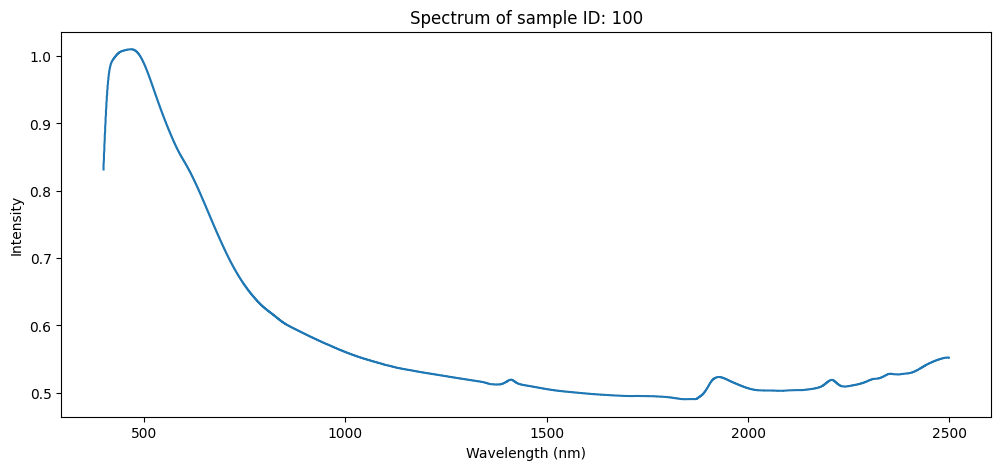

In [ ]:
import matplotlib.pyplot as plt

row = df.iloc[0]

spectrum = row.filter(like="spc.")

wavelengths = [float(col.split(".")[1]) for col in spectrum.index]
intensity = spectrum.values


plt.figure(figsize=(12, 5))
plt.plot(wavelengths, intensity)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Spectrum of sample ID: {}".format(row['sample.ID']))
plt.show()


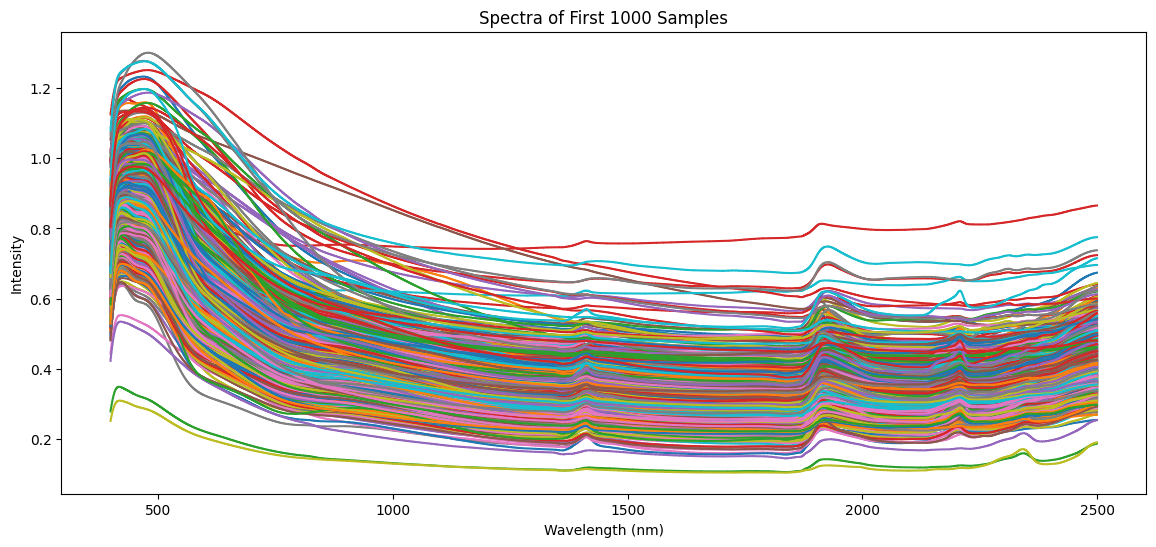

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

num_samples = 1000

for i in range(num_samples):
    row = df.iloc[i]
    spectrum = row.filter(like="spc.")
    wavelengths = [float(col.split(".")[1]) for col in spectrum.index]
    intensity = spectrum.values
    plt.plot(wavelengths, intensity)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title(f"Spectra of First {num_samples} Samples")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew

columns = {
    "OC": "OC (g⋅kg⁻¹)",
    "N": "N (g⋅kg⁻¹)",
    "CEC": "CEC (cmol+⋅kg⁻¹)",
    "pH.in.H2O": "pH",
    "sand": "Sand (%)",
    "clay": "Clay (%)"
}

rows = []

for col, name in columns.items():
    data = df[col].dropna()
    stats = {
        "Property": name,
        "Total": len(data),
        "Min": np.min(data),
        "Q1": np.percentile(data, 25),
        "Median": np.median(data),
        "Q3": np.percentile(data, 75),
        "Max": np.max(data),
        "Mean": np.mean(data),
        "Std": np.std(data, ddof=1),
        "Skew": skew(data, bias=False)
    }
    rows.append(stats)

summary_df = pd.DataFrame(rows)

summary_df = summary_df.round({
    "Min": 2, "Q1": 2, "Median": 2, "Q3": 2,
    "Max": 2, "Mean": 2, "Std": 2, "Skew": 2
})

print(summary_df.to_string(index=False))


        Property  Total  Min    Q1  Median    Q3    Max  Mean   Std  Skew
     OC (g⋅kg⁻¹)  19036 0.00 12.70   20.80 39.70 586.80 50.00 91.31  3.68
      N (g⋅kg⁻¹)  19036 0.00  1.20    1.70  2.90  38.60  2.92  3.76  3.76
CEC (cmol+⋅kg⁻¹)  19036 0.00  7.00   12.40 20.30 234.00 15.76 14.48  4.24
              pH  19036 3.21  5.02    6.21  7.47  10.08  6.20  1.35 -0.08
        Sand (%)  17939 1.00 19.00   42.00 64.00  99.00 42.88 26.11  0.19
        Clay (%)  17939 0.00  8.00   17.00 26.50  79.00 18.88 13.00  0.91


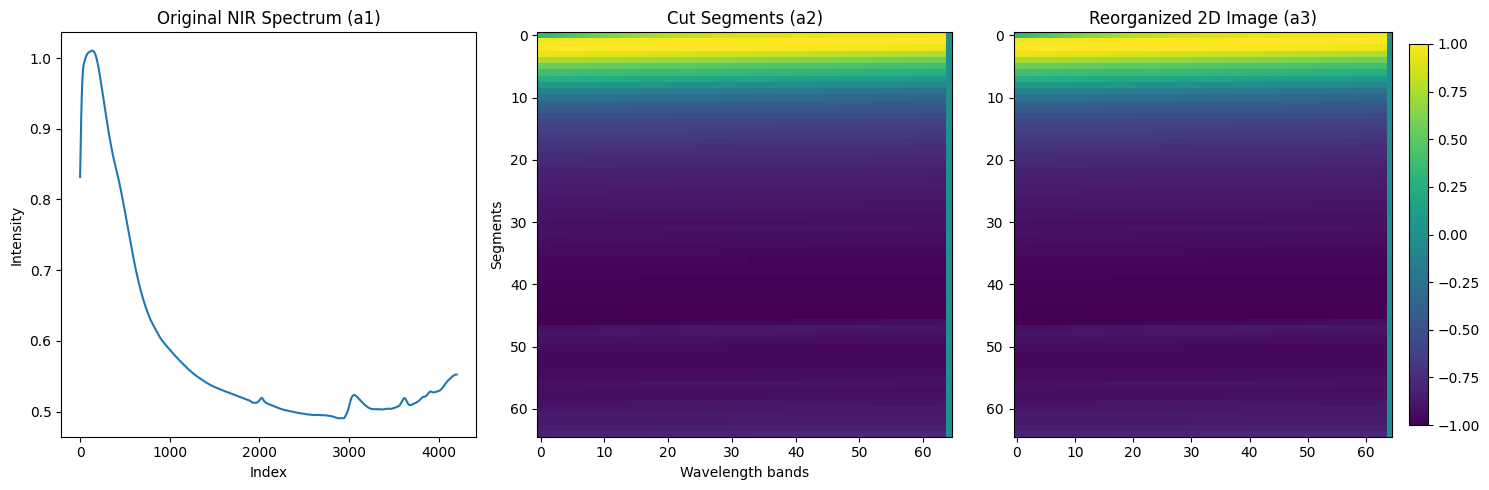

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1. Select one sample ----------
row = df.iloc[0]
spectrum = row.filter(like="spc.")
intensity = spectrum.values.astype(float)

# ---------- 2. Normalization (-1,1) ----------
min_val, max_val = intensity.min(), intensity.max()
normalized = 2 * (intensity - min_val) / (max_val - min_val) - 1

# ---------- 3. Cutting into 65 bands ----------
total_len = len(normalized)  # should be 4200
bands = 65
window_size = total_len // bands  # ~64
cut_segments = []

for i in range(bands):
    start = i * window_size
    end = start + window_size
    segment = normalized[start:end]

    # pad with zeros if shorter than bands
    if len(segment) < bands:
        segment = np.pad(segment, (0, bands - len(segment)))
    else:
        segment = segment[:bands]

    cut_segments.append(segment)

# ---------- 4. Reshape to 65×65 matrix ----------
img = np.array(cut_segments)

# ---------- 5. Visualization ----------
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# (a1) Original spectrum
axs[0].plot(intensity)
axs[0].set_title("Original NIR Spectrum (a1)")
axs[0].set_xlabel("Index")
axs[0].set_ylabel("Intensity")

# (a2) After cutting (bands)
axs[1].imshow(np.array(cut_segments), aspect="auto", cmap="viridis")
axs[1].set_title("Cut Segments (a2)")
axs[1].set_xlabel("Wavelength bands")
axs[1].set_ylabel("Segments")

# (a3) Reorganized 2D image
im = axs[2].imshow(img, cmap="viridis", aspect="auto")
axs[2].set_title("Reorganized 2D Image (a3)")
plt.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


In [ ]:
spectra_df.shape

(784, 257)

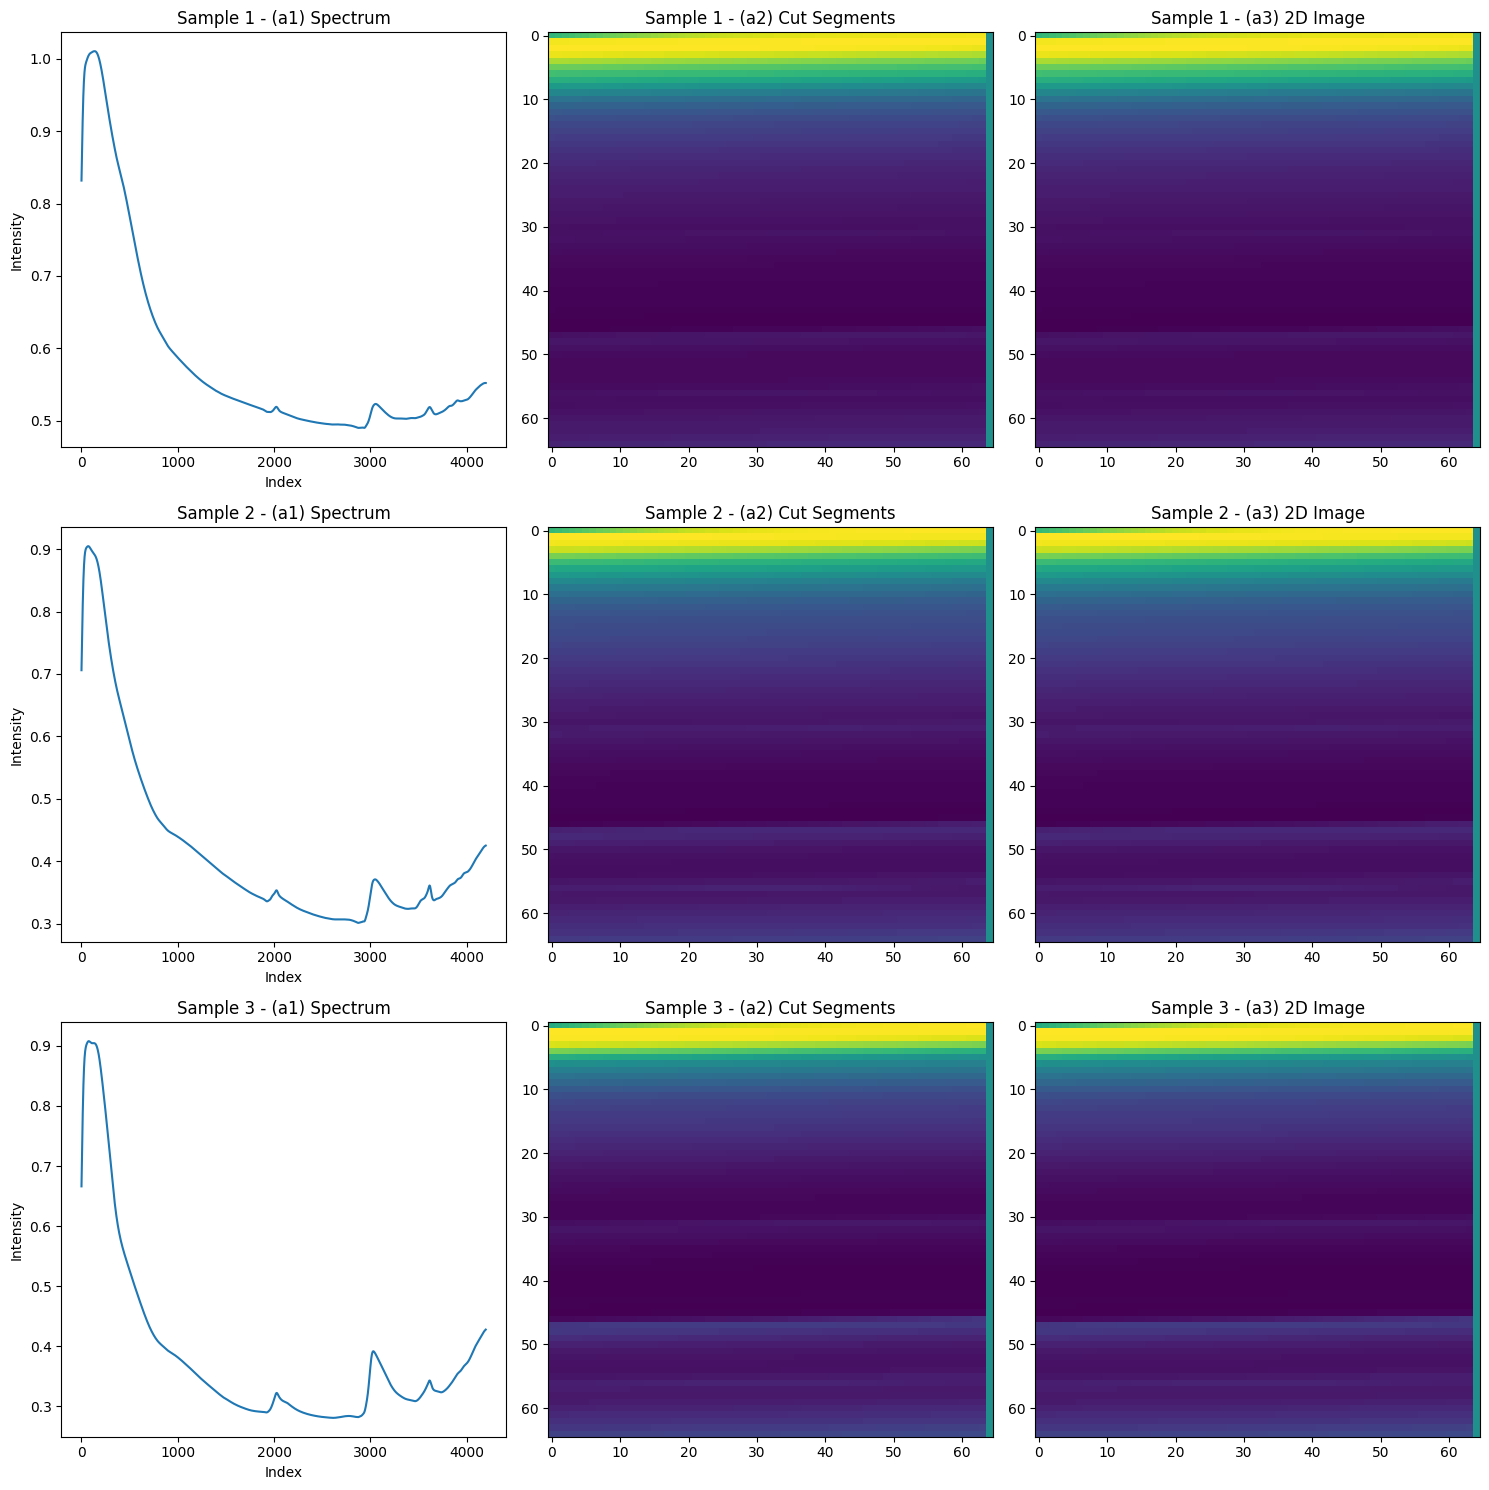

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples to process
num_samples = 3

fig, axs = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))

for idx in range(num_samples):
    row = df.iloc[idx]
    spectrum = row.filter(like="spc.")
    intensity = spectrum.values.astype(float)

    # (1) Normalization (-1,1)
    min_val, max_val = intensity.min(), intensity.max()
    normalized = 2 * (intensity - min_val) / (max_val - min_val) - 1

    # (2) Cutting into 65 bands
    total_len = len(normalized)  # usually 4200
    bands = 65
    window_size = total_len // bands
    cut_segments = []

    for i in range(bands):
        start = i * window_size
        end = start + window_size
        segment = normalized[start:end]

        if len(segment) < bands:
            segment = np.pad(segment, (0, bands - len(segment)))
        else:
            segment = segment[:bands]

        cut_segments.append(segment)

    # (3) Reorganized 65×65 matrix
    img = np.array(cut_segments)

    # ---- Plot ----
    # (a1) Original spectrum
    axs[idx, 0].plot(intensity)
    axs[idx, 0].set_title(f"Sample {idx+1} - (a1) Spectrum")
    axs[idx, 0].set_xlabel("Index")
    axs[idx, 0].set_ylabel("Intensity")

    # (a2) Cut Segments
    axs[idx, 1].imshow(np.array(cut_segments), aspect="auto", cmap="viridis")
    axs[idx, 1].set_title(f"Sample {idx+1} - (a2) Cut Segments")

    # (a3) Reorganized 2D Image
    im = axs[idx, 2].imshow(img, cmap="viridis", aspect="auto")
    axs[idx, 2].set_title(f"Sample {idx+1} - (a3) 2D Image")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ---------- Parameters ----------
save_dir = "/content/Cut_images"
os.makedirs(save_dir, exist_ok=True)

bands = 65   # 65 × 65 image
start_idx = 0
batch_size = 500
total_rows = len(df)

for batch_start in range(start_idx, total_rows, batch_size):
    batch_end = min(batch_start + batch_size, total_rows)
    print(f"Processing batch: {batch_start} to {batch_end-1}")

    for idx in range(batch_start, batch_end):
        row = df.iloc[idx]
        spectrum = row.filter(like="spc.").values.astype(float)

        # ---------- Normalization (-1,1) ----------
        min_val, max_val = spectrum.min(), spectrum.max()
        normalized = 2 * (spectrum - min_val) / (max_val - min_val) - 1

        # ---------- Cutting into bands ----------
        total_len = len(normalized)
        window_size = total_len // bands
        cut_segments = []

        for i in range(bands):
            start = i * window_size
            end = start + window_size
            segment = normalized[start:end]

            # pad if shorter
            if len(segment) < bands:
                segment = np.pad(segment, (0, bands - len(segment)))
            else:
                segment = segment[:bands]

            cut_segments.append(segment)

        # ---------- Reshape to 65×65 ----------
        img = np.array(cut_segments)

        # ---------- Save image ----------
        plt.figure(figsize=(0.65, 0.65), dpi=100)  #  65×65 px
        plt.imshow(img, cmap="viridis", origin="upper", vmin=-1, vmax=1)
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.savefig(os.path.join(save_dir, f"CUT_{idx}.png"))
        plt.close()

    print(f"Batch {batch_start} to {batch_end-1} done ✅")

Processing batch: 0 to 499
Batch 0 to 499 done ✅
Processing batch: 500 to 999
Batch 500 to 999 done ✅
Processing batch: 1000 to 1499
Batch 1000 to 1499 done ✅
Processing batch: 1500 to 1999
Batch 1500 to 1999 done ✅
Processing batch: 2000 to 2499
Batch 2000 to 2499 done ✅
Processing batch: 2500 to 2999
Batch 2500 to 2999 done ✅
Processing batch: 3000 to 3499
Batch 3000 to 3499 done ✅
Processing batch: 3500 to 3999
Batch 3500 to 3999 done ✅
Processing batch: 4000 to 4499
Batch 4000 to 4499 done ✅
Processing batch: 4500 to 4999
Batch 4500 to 4999 done ✅
Processing batch: 5000 to 5499
Batch 5000 to 5499 done ✅
Processing batch: 5500 to 5999
Batch 5500 to 5999 done ✅
Processing batch: 6000 to 6499
Batch 6000 to 6499 done ✅
Processing batch: 6500 to 6999
Batch 6500 to 6999 done ✅
Processing batch: 7000 to 7499
Batch 7000 to 7499 done ✅
Processing batch: 7500 to 7999
Batch 7500 to 7999 done ✅
Processing batch: 8000 to 8499
Batch 8000 to 8499 done ✅
Processing batch: 8500 to 8999
Batch 8500 t

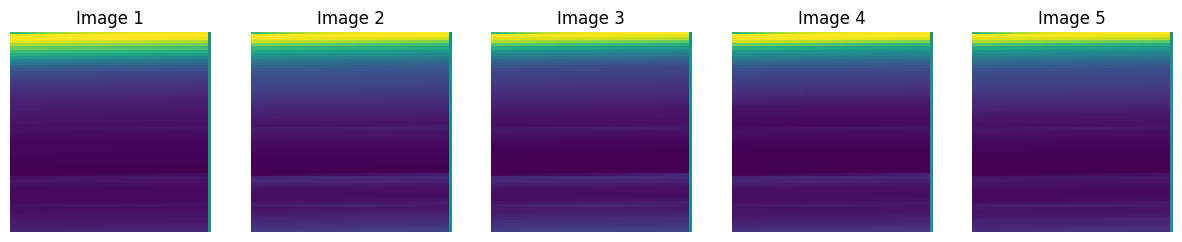

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# ----- Path to images -----
img_dir = "/content/Cut_images"

# ----- Get first 5 image paths -----
img_files = sorted(os.listdir(img_dir))[:5]

# ----- Read and show images -----
plt.figure(figsize=(15, 5))
for i, file in enumerate(img_files):
    img_path = os.path.join(img_dir, file)
    img = Image.open(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis("off")

plt.show()


In [ ]:
import shutil
from google.colab import files

# ---------- 1. ZIP the folder ----------
shutil.make_archive("/content/Cut_images", 'zip', "/content/Cut_images")

# ---------- 2. Download the ZIP ----------
files.download("/content/Cut_images.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>